In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [7]:
# 1. 년도, 월별 멀티 인덱스 설정, 및 데이터
# 2. 2016년 사고대비 사망율을 보여 주시요
# 3. 2014년도 월별 사망, 부상 데이터 바차트
# 4. 2015년 대비 사망이 가장 많이 증가한 2016년도 월 구하기

In [111]:
y2014 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python')
y2015 = pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python')
y2016 = pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python')
df = pd.concat([y2014, y2015, y2016])
df

구분  사고(건)  사망(명)  부상(명)
0    2014년1월    169      7    347
1    2014년2월    145      3    268
2    2014년3월    206     12    358
3    2014년4월    182      4    360
4    2014년5월    218     17    474
5    2014년6월    233     13    457
6    2014년7월    229     14    431
7    2014년8월    222      9    447
8    2014년9월    225     15    430
9   2014년10월    210     14    392
10  2014년11월    209     10    386
11  2014년12월    178     12    329
0    2015년1월    205      8    375
1    2015년2월    175      8    375
2    2015년3월    237      4    492
3    2015년4월    227     10    486
4    2015년5월    231      9    504
5    2015년6월    207      8    401
6    2015년7월    273      7    556
7    2015년8월    268     19    534
8    2015년9월    252     10    501
9   2015년10월    214     14    475
10  2015년11월    199      3    398
11  2015년12월    213      8    428
0    2016년1월    192      5    387
1    2016년2월    174      6    328
2    2016년3월    217      7    435
3    2016년4월    216      7    419
4    2016년5월    239     13    522
5    2016년6월    200     12    362
6    2016년7월    227      9    460
7    2016년8월    230      7    490
8    2016년9월    187     13    347
9   2016년10월    183     10    367
10  2016년11월    200      5    418
11  2016년12월    168      4    364

In [113]:
df['년도'] = df['구분'].str[:5]
df['월'] = df['구분'].str[5:-1].astype(int)
df.drop( columns=['구분'], inplace=True )
df = df.pivot_table(index=['년도', '월'])
df

부상(명)  사고(건)  사망(명)
년도    월                      
2014년 1     347    169      7
      2     268    145      3
      3     358    206     12
      4     360    182      4
      5     474    218     17
      6     457    233     13
      7     431    229     14
      8     447    222      9
      9     430    225     15
      10    392    210     14
      11    386    209     10
      12    329    178     12
2015년 1     375    205      8
      2     375    175      8
      3     492    237      4
      4     486    227     10
      5     504    231      9
      6     401    207      8
      7     556    273      7
      8     534    268     19
      9     501    252     10
      10    475    214     14
      11    398    199      3
      12    428    213      8
2016년 1     387    192      5
      2     328    174      6
      3     435    217      7
      4     419    216      7
      5     522    239     13
      6     362    200     12
      7     460    227      9
      8     490    230      7
      9     347    187     13
      10    367    183     10
      11    418    200      5
      12    364    168      4

In [114]:
# 2. 2016년 사고대비 사망율을 보여 주시요
df.loc['2016년']['사망(명)']/df.loc['2016년']['사고(건)']

월
1     0.026042
2     0.034483
3     0.032258
4     0.032407
5     0.054393
6     0.060000
7     0.039648
8     0.030435
9     0.069519
10    0.054645
11    0.025000
12    0.023810
dtype: float64

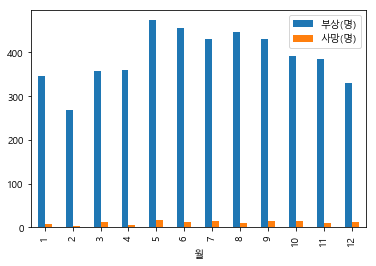

In [115]:
# 3. 2014년도 월별 사망, 부상 데이터 바차트
df.loc['2014년'][['부상(명)','사망(명)']].plot(kind='bar')
plt.show()

In [116]:
# 4. 2015년 대비 사망이 가장 많이 증가한 2016년도 월 구하기
# d2016 = df.loc['2016년']['사망(명)'] - df.loc['2015년']['사망(명)']
d2016 = df.loc['2016년']['사망(명)'] / df.loc['2015년']['사망(명)']
df.loc['2016년'][d2016 == d2016.max()]

부상(명)  사고(건)  사망(명)
월                     
3    435    217      7